In [44]:
import numpy as np
from pylab import *


In [45]:
#testing fft and ift
x = np.random.randn(100)
#dft
x_dft = np.fft.fft(x) 
#ift
x1 = np.fft.ifft(x_dft)
np.abs(x-x1).max()

7.585048327265203e-16

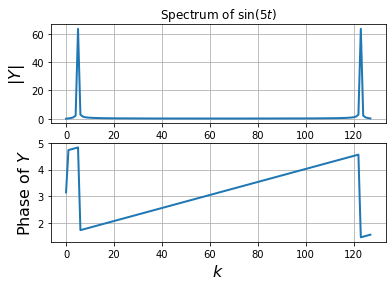

In [46]:
#plotting the spectrum of sin(5t)
x=linspace(0,2*pi,128)
y=sin(5*x)
Y=fft(y)
figure()
subplot(2,1,1)
plot(abs(Y),lw=2)
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\sin(5t)$")
grid(True)
subplot(2,1,2)
plot(unwrap(angle(Y)),lw=2)
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$k$",size=16)
grid(True)
show()

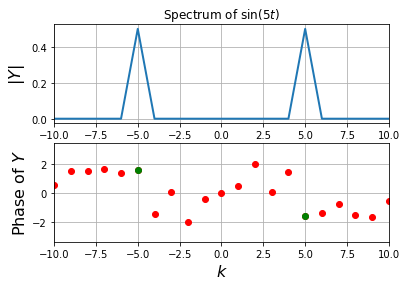

In [47]:
#plotting the spectrum of sin(5t) shifted
x=linspace(0,2*pi,129);x=x[:-1]
y=sin(5*x)
Y=fftshift(fft(y))/128.0
w=linspace(-64,64,129); w = w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),lw=2)
xlim([-10,10])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\sin(5t)$")
grid(True)
subplot(2,1,2)
plot(w,angle(Y),'ro',lw=2)
ii=where(abs(Y)>1e-3)
plot(w[ii],angle(Y[ii]),'go',lw=2)
xlim([-10,10])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$k$",size=16)
grid(True)
show()

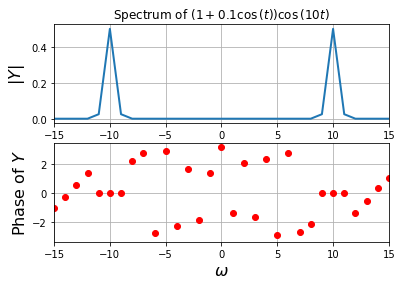

In [48]:
#plotting the spectrum of (1+0.1cos(t))cos(10t)
t=linspace(0,2*pi,129);t=t[:-1]
y=(1+0.1*cos(t))*cos(10*t)
Y=fftshift(fft(y))/128.0
w=linspace(-64,64,129); w = w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),lw=2)
xlim([-15,15])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\left(1+0.1\cos\left(t\right)\right)\cos\left(10t\right)$")
grid(True)
subplot(2,1,2)
plot(w,angle(Y),'ro',lw=2)
xlim([-15,15])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()

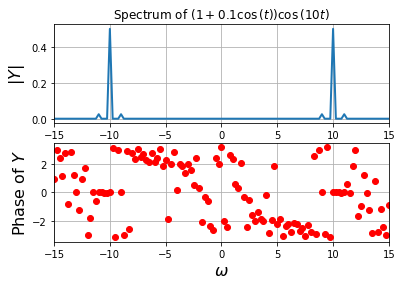

In [49]:
#plotting the spectrum of (1+0.1cos(t))cos(10t) shifted, with higher sampling rate
t=linspace(-4*pi,4*pi,513);t=t[:-1]
y=(1+0.1*cos(t))*cos(10*t)
Y=fftshift(fft(y))/512.0
w=linspace(-64,64,513);w=w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),lw=2)
xlim([-15,15])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\left(1+0.1\cos\left(t\right)\right)\cos\left(10t\right)$")
grid(True)
subplot(2,1,2)
plot(w,angle(Y),'ro',lw=2)
xlim([-15,15])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()

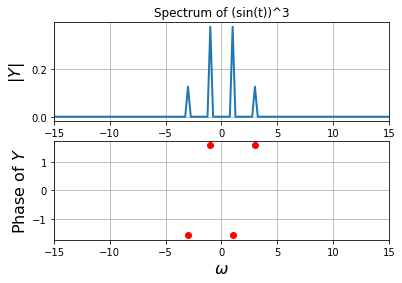

In [50]:
#plotting the spectrum of sin^3(t)
t=linspace(-4*pi,4*pi,513);t=t[:-1]
y=sin(t)**3
Y=fftshift(fft(y))/512.0
w=linspace(-64,64,513);w=w[:-1]

figure()
subplot(2,1,1)
plot(w,abs(Y),lw=2)
xlim([-15,15])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of (sin(t))^3")
grid(True)

subplot(2,1,2)
ii = where(abs(Y)>1e-3)
plot(w[ii],angle(Y[ii]),'ro',lw=2)
xlim([-15,15])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)

savefig("fig9-4.png")
show()

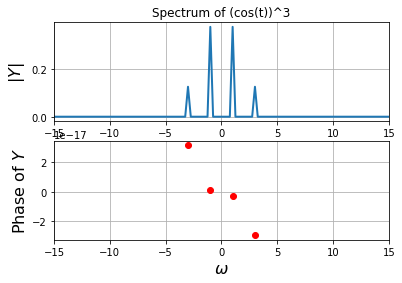

In [51]:
#plotting the spectrum of cos^3(t)
t=linspace(-4*pi,4*pi,513);t=t[:-1]
y=cos(t)**3
Y=fftshift(fft(y))/512.0
w=linspace(-64,64,513);w=w[:-1]

figure()
subplot(2,1,1)
plot(w,abs(Y),lw=2)
xlim([-15,15])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of (cos(t))^3")
grid(True)

subplot(2,1,2)
ii = where(abs(Y)>1e-3)
plot(w[ii],angle(Y[ii]),'ro',lw=2)
xlim([-15,15])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)

savefig("fig9-4.png")
show()

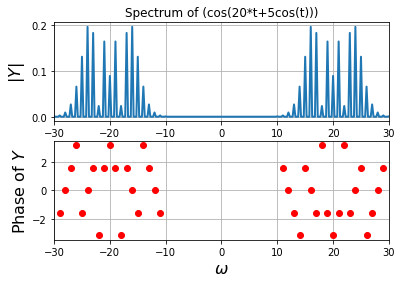

In [52]:
#plotting the spectrum of cos(20*t+5cos(t))
t=linspace(-4*pi,4*pi,513);t=t[:-1]
y=cos(20*t+5*cos(t))
Y=fftshift(fft(y))/512.0
w=linspace(-64,64,513);w=w[:-1]

figure()
subplot(2,1,1)
plot(w,abs(Y),lw=2)
xlim([-30,30])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of (cos(20*t+5cos(t)))")
grid(True)

subplot(2,1,2)
ii = where(abs(Y)>1e-3)
plot(w[ii],angle(Y[ii]),'ro',lw=2)
xlim([-30,30])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)

show()

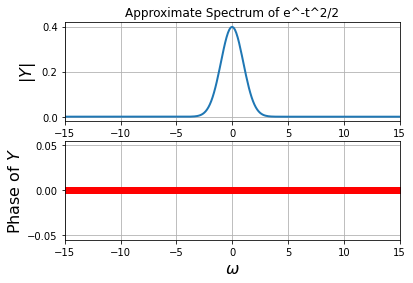

In [59]:
#Approximated spectrum of e^-t^2/2
tolerance = 1e-6
Y_old = 0
error = tolerance + 1
start = 4*pi
samples = 256
niter = 0
while error > tolerance:
    t = linspace(-start,start,samples+1);t=t[:-1]
    y = exp(-t**2/2)
    Y_approx = fftshift(fft(ifftshift(y))) * (start/(pi*samples))
    w = linspace(-samples*pi/(start*2), samples*pi/(start*2), samples+1); w=w[:-1]
    error = sum(abs(Y_approx[::2] - Y_old))
    Y_old = Y_approx
    samples = samples*2
    start = start*2
    niter = niter + 1

#plotting approximated spectrum


subplot(2,1,1)
plot(w,abs(Y_approx),lw=2)
xlim([-15,15])
ylabel(r"$|Y|$",size=16)
title(r"Approximate Spectrum of e^-t^2/2")
grid(True)

subplot(2,1,2)
phi = angle(Y_approx)
phi[where(abs(Y_approx)<1e-3)] = 0
plot(w,phi,'ro',lw=2)
xlim([-15,15])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()


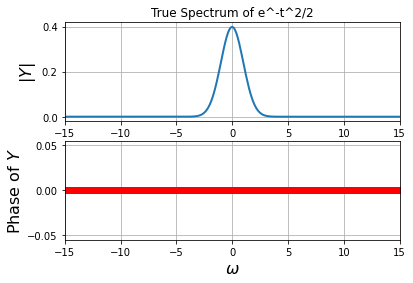

In [54]:
#True Spectrum
#t and w are same as above
y = exp(-t**2/2)
Y_true =  1/sqrt(2*pi)*exp(-w**2/2)#fourier transform of a gaussian function is a gaussian function

subplot(2,1,1)
plot(w,abs(Y_true),lw=2)
xlim([-15,15])
ylabel(r"$|Y|$",size=16)
title(r"True Spectrum of e^-t^2/2")
grid(True)

subplot(2,1,2)
plot(w,angle(Y_true),'ro',lw=2)
xlim([-15,15])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)

show()


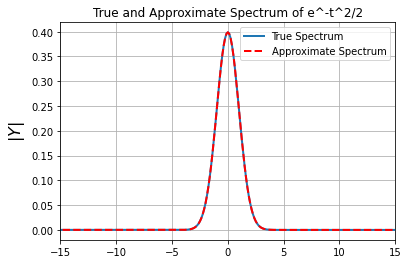

Error: 1.86620529933118e-14


In [55]:
#Plotting the two spectrums on the same graph:
plot(w,abs(Y_true),lw=2)
plot(w,abs(Y_approx), 'r--', lw=2)
xlim([-15,15])
ylabel(r"$|Y|$",size=16)
title(r"True and Approximate Spectrum of e^-t^2/2")
grid(True)
legend(["True Spectrum","Approximate Spectrum"])
show()

true_error = sum(abs(Y_approx - (1/sqrt(2*pi))*exp(-w**2/2)))
print("Error: " + str(true_error))